# Pràctica 5: Arbres de Decisió

## Gerard Santacatalina Rubio - 1534002

## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent **dijous abans de les 23:59**. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Aquesta pràctica tractará els següents temes:

* A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)
* B. Selecció de mesures d'atributs (20%)
* C. Pruning (20%)
* D. Ensembles (30%)

Per descomptat, tots els experiments seguiran aplicant els coneixements apresos a les pràctiques anteriors, és a dir, aplicant una metodologia correcta de crosvalidació per tal de poder extreure conclusions vàlides.


### Datasets

Es faràn servir dues bases de dades:

* **car_evaluation.csv** (target: 'class') 

* **income_evaluation.csv** (target: 'income')

Inicialment, es farán les proves amb el car_evaluation. Al apartat D s'utilitzaràn els dos. De tota forma, si ho preferiu, també podeu anar fer proves amb income_evaluation ens els altres apartats.


### Introducció

Els arbres de decisió són un dels algorismes d’aprenentatge automàtic més populars. Utilitzen una estructura semblant a la dels arbres (o també en possibles combinacions seves). Pertany a la classe d’algoritmes d’aprenentatge supervisat on es pot utilitzar tant amb finalitats de classificació com de regressió.


Un arbre de decisió és una estructura que inclou un node arrel, branques i nodes de fulles. Cada node intern indica una prova d'un atribut, cada branca indica el resultat d'una prova i cada node fulla té una etiqueta de classe. El node més superior de l'arbre és el node arrel.

La terminologia implicada en l'algorisme de l'arbre de decisions són els següents:

* **Node arrel**: Representa tota la població o la mostra. A més, es divideix en dos o més conjunts homogenis.
* **Divisió**: És el procés de dividir un node en dos o més subnodes.
* **Node de decisió**: Quan un node es divideix en altres subnodes, es diu node de decisió.
* **Fulla / node terminal**: Els nodes que no es divideixen s’anomenen nodes Fulla o Terminals.
* **Poda**: Quan eliminem els subnodes d’un node de decisió, aquest procés s’anomena poda. És el procés contrari de la divisió.
* **Branca / subarbre**: Una subsecció d'un arbre sencer s'anomena branca o subarbre.
* **Node pare i fill**: Un node, que es divideix en subnodes, s’anomena node pare de subnodes on els subnodes són fills d’un node pare.

![Decision-Tree terminology](https://gdcoder.com/content/images/2019/05/Screen-Shot-2019-05-18-at-03.40.41.png)

Com s'ha explicat a teoria, els arbres de decisió originals treballaven sobre atributs categorics sense problema. Ara bé, la implementació de sklearn i la majoria de les actuals, necesita dades númeriques, aixi que haurem de transformar les nostres bases de dades a aquesta tipologia.

Explicació del la tipologia de arbres de Decisió: ID3, C4.5, C5.0 i CART. Sabeu quin està implementat a sklearn i per què les dades d'entrada han de ser numèriques i no categòriques? **[Pista](https://scikit-learn.org/stable/modules/tree.html)**


In [1]:
# Importar llibreries i obrir el dataset

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set_theme()

# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple

dataset_path = 'income_evaluation.csv'
target_name = 'income'

dataset_path = 'car_evaluation.csv'
target_name = 'class'

dataset = load_dataset(dataset_path)
y = dataset[target_name]
X = dataset.drop(target_name, axis="columns")

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (1728, 7)


In [2]:
display(dataset)

display(y)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# check the shape of X_train and X_test
X_train.shape, X_test.shape


((1382, 6), (346, 6))

## A. Estructura dels Arbres de Decisió i codificació d'atributs (30%)

Com transformar dades Categoriques en numèriques:

**[module-sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)**

o bé, 

**[Category Encoders](https://contrib.scikit-learn.org/category_encoders/)**

Aquesta llibreria us permetrar provar codificacions ben diferents..:
* BackwardDifferenceEncoder
* BaseNEncoder
* BinaryEncoder
* CatBoostEncoder
* CountEncoder
* GLMMEncoder
* HashingEncoder
* HelmertEncoder
* JamesSteinEncoder
* LeaveOneOutEncoder
* MEstimateEncoder
* OneHotEncoder
* OrdinalEncoder
* SumEncoder
* PolynomialEncoder
* TargetEncoder
* WOEEncoder

En aquest enllaç hi podreu trobar alguns **[exemples](https://www.kaggle.com/discdiver/category-encoders-examples)**.

**[Com aplicar-ho a pandas?](https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn)**


In [4]:

print(X_test.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')


In [5]:
# Una manenra d'aplicar-ho a columnes en concret
import category_encoders as ce

# encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder = ce.OrdinalEncoder(cols=['buying'])

encoded_X_train_1 = encoder.fit_transform(X_train)
encoded_X_test_1 = encoder.transform(X_test)

encoded_X_train_1

,buying,maint,doors,persons,lug_boot,safety
107,1,vhigh,5more,more,big,high
901,2,vhigh,3,4,small,med
1709,3,low,5more,2,big,high
706,4,med,4,2,med,med
678,4,med,3,2,med,low
...,...,...,...,...,...,...
1130,2,med,3,more,med,high
1294,2,low,5more,more,big,med
860,4,low,5more,more,med,high
1459,3,high,4,2,small,med


In [6]:
# Una altra manera per fer-ho a totes les columnes no númeriques..

from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

encoders = defaultdict(LabelEncoder)

# Encoding the variable
encoded_X_train_2 = X_train.apply(lambda x: encoders[x.name].fit_transform(x))
encoded_X_test_2 = X_test.apply(lambda x: encoders[x.name].transform(x))


# Inverse the encoded
inversed_X_train = encoded_X_train_2.apply(lambda x: encoders[x.name].inverse_transform(x))

# Using the dictionary to label future data
# X_train.apply(lambda x: encoders[x.name].transform(x))

print("\n The result of transforming X with LabelEncoder:")
print(encoded_X_train_2)



 The result of transforming X with LabelEncoder:
      buying  maint  doors  persons  lug_boot  safety
107        3      3      3        2         0       0
901        2      3      1        1         2       2
1709       1      1      3        0         0       0
706        0      2      2        0         1       2
678        0      2      1        0         1       1
...      ...    ...    ...      ...       ...     ...
1130       2      2      1        2         1       0
1294       2      1      3        2         0       2
860        0      1      3        2         1       0
1459       1      0      2        0         2       2
1126       2      2      1        2         2       2

[1382 rows x 6 columns]


## Creació i visualització d'arbres de decisió

Sklearn ens dona una versió bàsica dels algorismes de generació d'arbres de decisió [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Caldrà treballar sobre els diferents paràmetres per a obtenir la millor solució per, almenys, un dels problemes plantejats.

Per visualitzar els arbres hi ha diferents possibilitats que podeu usar [exemples](https://mljar.com/blog/visualize-decision-tree/)

|--- feature_3 <= 0.50
|   |--- class: unacc
|--- feature_3 >  0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_0 <= 0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: acc
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: unacc
|   |   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |   |--- class: acc
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- class: unacc
|   |   |   |--- feature_0 >  0.50
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |   |--- feature

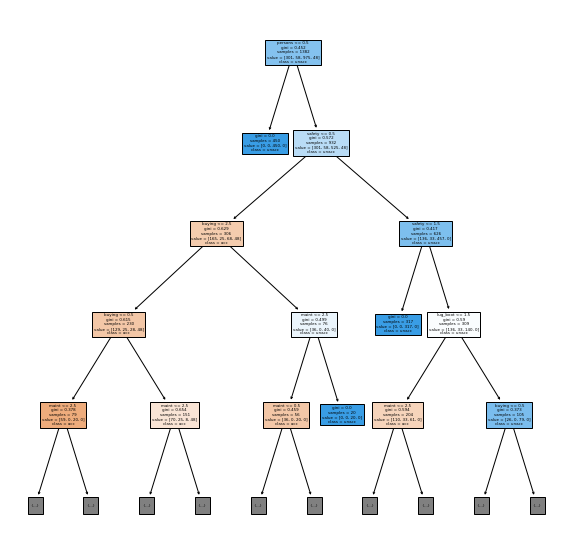

In [7]:
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

clf = DecisionTreeClassifier(random_state=1234)
clf.fit(encoded_X_train_2, y_train)
text_representation = tree.export_text(clf)
print(text_representation)


fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf, max_depth=4,
                   feature_names=X.columns,
                   class_names=clf.classes_,
                   filled=True)
plt.show()


Un cross validation NO és un random forest !!

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, max_depth=None)
iris = load_iris()
cross_val_score(clf, iris.data, iris.target, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

### Preguntes
1. Proveu diferents codificacions per transformar els vostres atributs categorics en númerics. Expliqueu els beneficis o inconvenients de les codificacions provades.
2. Crea un arbre arbre de decisió amb les dades transformades.
3. Mostra el arbre de diferents formes
4. Extreu caracteristiques que quantifiquin com és l'arbre. Més endavant també en farem ús per comparar diferents arbres. A continuació et mostro algunes possibles característiques. Penseu en generar-ne alguna més que cregueu útil:
 * número de nodes total,
 * número de nodes fulla,
 * ratio de nodes fulla respecte el total,
 * profunditat mitjana de les fulles,
 * atributs més utilitzats,
 * entropia o impuresa dels nodes fulla
 * ... 
5. Com afecta la codificació utilitzada a la interpretabilitat del model, veus alguna relació amb les característiques del arbre?

In [9]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
X = np.asarray([['Male', 1], ['Female', 4], ['Female', 2]])
enc.fit(X)

enc.categories_

[array(['Female', 'Male'], dtype='<U11'), array(['1', '2', '4'], dtype='<U11')]

In [10]:
enc.transform(X).toarray()

array([[0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

#### Pregunta 1: Proveu diferents codificacions per transformar els vostres atributs categòrics en numèrics. Expliqueu els beneficis o inconvenients de les codificacions provades.

Al BackwardDifferenceEncoder la mitjana d'una variable dependent és comparada amb la mitjana de la variable dependent del nivell anterior, per això el nom "backward". Aquest mode de codificació treballarà bé per variables nominals/ordinals. 

In [11]:
encoded_trainings = []
encoder = ce.BackwardDifferenceEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

train_codificat = encoder.fit_transform(X_train)
test_codificat = encoder.transform(X_test)
encoded_trainings.append(train_codificat)
train_codificat

,intercept,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,lug_boot_0,lug_boot_1,safety_0,safety_1
107,1,-0.750,-0.500,-0.250,-0.750,-0.500,-0.250,-0.750,-0.500,-0.250,-0.667,-0.333,-0.667,-0.333,-0.667,-0.333
901,1,0.250,-0.500,-0.250,-0.750,-0.500,-0.250,0.250,-0.500,-0.250,0.333,-0.333,0.333,-0.333,0.333,-0.333
1709,1,0.250,0.500,-0.250,0.250,-0.500,-0.250,-0.750,-0.500,-0.250,0.333,0.667,-0.667,-0.333,-0.667,-0.333
706,1,0.250,0.500,0.750,0.250,0.500,-0.250,0.250,0.500,-0.250,0.333,0.667,0.333,0.667,0.333,-0.333
678,1,0.250,0.500,0.750,0.250,0.500,-0.250,0.250,-0.500,-0.250,0.333,0.667,0.333,0.667,0.333,0.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,0.250,-0.500,-0.250,0.250,0.500,-0.250,0.250,-0.500,-0.250,-0.667,-0.333,0.333,0.667,-0.667,-0.333
1294,1,0.250,-0.500,-0.250,0.250,-0.500,-0.250,-0.750,-0.500,-0.250,-0.667,-0.333,-0.667,-0.333,0.333,-0.333
860,1,0.250,0.500,0.750,0.250,-0.500,-0.250,-0.750,-0.500,-0.250,-0.667,-0.333,0.333,0.667,-0.667,-0.333
1459,1,0.250,0.500,-0.250,0.250,0.500,0.750,0.250,0.500,-0.250,0.333,0.667,0.333,-0.333,0.333,-0.333


El CountEncoder següent codifica un valor categòric amb la freqüència d'aquell valor per tot el dataset, això ho fa per totes les característiques. Osigui si per un atribut categòric i tenim categoria 1 per exemple i tenim 200 exemples aleshores aquest atribut es canviarà pel valor 200. Passem de atributs categòrics a numèrics. Aquí la taula no augmenta de mida com a molts altres codificadors passa, aleshores això és un punt a favor.

In [12]:
encoder = ce.CountEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])
encoder_1 = ce.CountEncoder(cols=["class"])

train_codificat_poli = encoder.fit_transform(X_train)
test_codificat_poli = encoder.transform(X_test)
target_codificat = encoder_1.fit_transform(y_train)
encoded_trainings.append(train_codificat_poli)
train_codificat_poli

,buying,maint,doors,persons,lug_boot,safety
107,338,339,345,459,461,455
901,355,339,342,473,463,458
1709,349,334,345,450,461,455
706,340,352,346,450,458,458
678,340,352,342,450,458,469
...,...,...,...,...,...,...
1130,355,352,342,459,458,455
1294,355,334,345,459,461,458
860,340,334,345,459,458,455
1459,349,357,346,450,463,458


In [13]:
target_codificat

,class
107,975
901,975
1709,975
706,975
678,975
...,...
1130,48
1294,58
860,301
1459,975


El SumEncoder treballa comparant la mitjana de la variable dependent o target d'un nivell determinat d'una columna categòrica per la mitjana general del target. És un tipus de codificació que ens dona un advantatge per la seva bona forma de treballar per models de regressió lineal. Ens separa també les columnes com podem veure i ens fa la taula més gran.

In [14]:
encoder = ce.SumEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

train_codificat = encoder.fit_transform(X_train)
test_codificat = encoder.transform(X_test)
encoded_trainings.append(train_codificat)
train_codificat

,intercept,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,lug_boot_0,lug_boot_1,safety_0,safety_1
107,1,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000
901,1,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000
1709,1,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,-1.000,-1.000,1.000,0.000,1.000,0.000
706,1,-1.000,-1.000,-1.000,0.000,0.000,1.000,0.000,0.000,1.000,-1.000,-1.000,-1.000,-1.000,0.000,1.000
678,1,-1.000,-1.000,-1.000,0.000,0.000,1.000,0.000,1.000,0.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,-1.000,-1.000,1.000,0.000
1294,1,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000
860,1,-1.000,-1.000,-1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,-1.000,-1.000,1.000,0.000
1459,1,0.000,0.000,1.000,-1.000,-1.000,-1.000,0.000,0.000,1.000,-1.000,-1.000,0.000,1.000,0.000,1.000


HelmertEncoder el que fa és comparar cada nivell d'una variable categòrica per la mitjana dels nivells subsequents. El avantatge d'aquest tipus de codificació és que potser realment interessant per variables categòriques amb nivells ordenats, com per exemple de més petit a més gran o de major a menor... Aquest tipus de codificador el que ens fa és separar-nos els atributs en diferents columnes, aleshores ens augmenta la dimensionalitat de la nostra taula. 

In [15]:
encoder = ce.HelmertEncoder(cols=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

train_codificat = encoder.fit_transform(X_train)
test_codificat = encoder.transform(X_test)
encoded_trainings.append(train_codificat)
train_codificat

,intercept,buying_0,buying_1,buying_2,maint_0,maint_1,maint_2,doors_0,doors_1,doors_2,persons_0,persons_1,lug_boot_0,lug_boot_1,safety_0,safety_1
107,1,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000
901,1,1.000,-1.000,-1.000,-1.000,-1.000,-1.000,1.000,-1.000,-1.000,1.000,-1.000,1.000,-1.000,1.000,-1.000
1709,1,0.000,2.000,-1.000,1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,2.000,-1.000,-1.000,-1.000,-1.000
706,1,0.000,0.000,3.000,0.000,2.000,-1.000,0.000,2.000,-1.000,0.000,2.000,0.000,2.000,1.000,-1.000
678,1,0.000,0.000,3.000,0.000,2.000,-1.000,1.000,-1.000,-1.000,0.000,2.000,0.000,2.000,0.000,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,1.000,-1.000,-1.000,0.000,2.000,-1.000,1.000,-1.000,-1.000,-1.000,-1.000,0.000,2.000,-1.000,-1.000
1294,1,1.000,-1.000,-1.000,1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,1.000,-1.000
860,1,0.000,0.000,3.000,1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,0.000,2.000,-1.000,-1.000
1459,1,0.000,2.000,-1.000,0.000,0.000,3.000,0.000,2.000,-1.000,0.000,2.000,1.000,-1.000,1.000,-1.000


Al següent cas amb el OrdinalEncoder simplement canviem un atribut categòric per un ordinal. Aquí no ens augmenta la dimensionalitat del nostre dataset afegint característiques o atributs perquè no li cal separar els atributs en diverses columnes.

In [16]:
encoder_temp = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
encoder_temp_target = ce.OrdinalEncoder(cols=['class'])
encoded_ordinal_train = encoder_temp.fit_transform(X_train)
encoded_ordinal_test = encoder_temp.transform(X_test)
encoded_ordinal_target_train = encoder_temp_target.fit_transform(y_train)
encoded_ordinal_target_test = encoder_temp_target.fit_transform(y_test)
encoded_trainings.append(encoded_ordinal_train)

encoded_ordinal_train

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3
...,...,...,...,...,...,...
1130,2,3,2,1,3,1
1294,2,2,1,1,1,2
860,4,2,1,1,3,1
1459,3,4,3,3,2,2


#### Pregunta 2: Crea un arbre arbre de decisió amb les dades transformades.

Mirem el arbre que ens surt si treballem amb el codificador BackwardDifference.

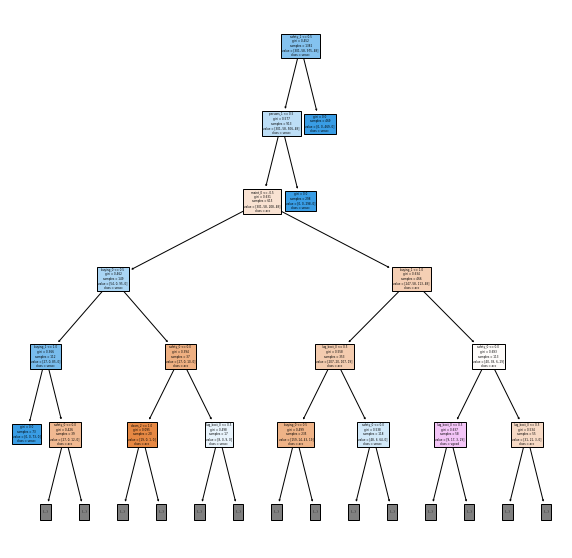

In [17]:
arbre_inicial = DecisionTreeClassifier(random_state = 777)
arbre_inicial.fit(train_codificat, y_train)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(arbre_inicial, max_depth=5,feature_names=train_codificat.columns,class_names=arbre_inicial.classes_,
                   filled=True)
plt.show()

Tot seguit tenim l'arbre de classificació fent servir com a codificador dels atributs el CountEncoder

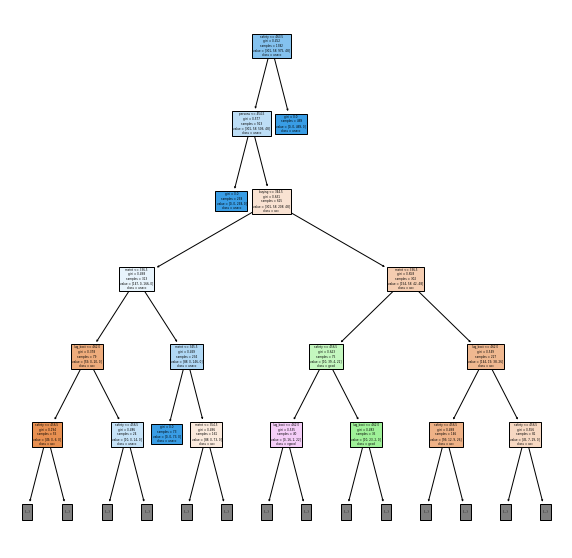

In [18]:
arbre_inicial_1 = DecisionTreeClassifier(random_state = 777)
arbre_inicial_1.fit(train_codificat_poli, y_train)

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(arbre_inicial_1, max_depth=5,feature_names=train_codificat_poli.columns, class_names=arbre_inicial.classes_,
                   filled=True)
plt.show()

#### Pregunta 3: Mostreu l'arbre de diferents formes.


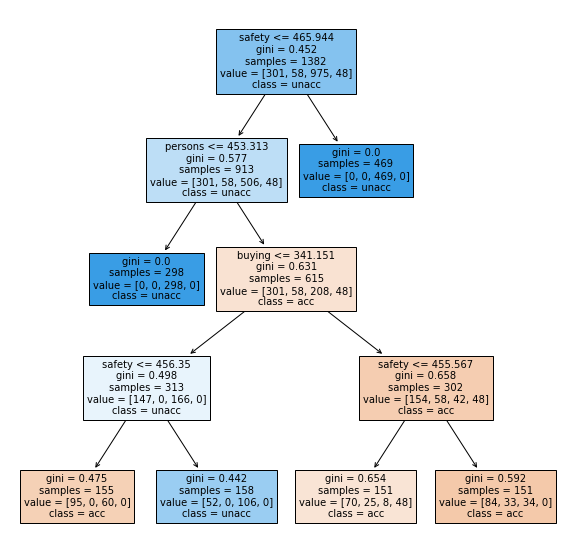

In [19]:
clf_2 = DecisionTreeClassifier(random_state = 777, splitter = 'random', 
                             min_weight_fraction_leaf=0.1 )
clf_2.fit(train_codificat_poli, y_train)


fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf_2, max_depth=5,feature_names=train_codificat_poli.columns, class_names=clf_2.classes_,
                   filled=True)
plt.show()

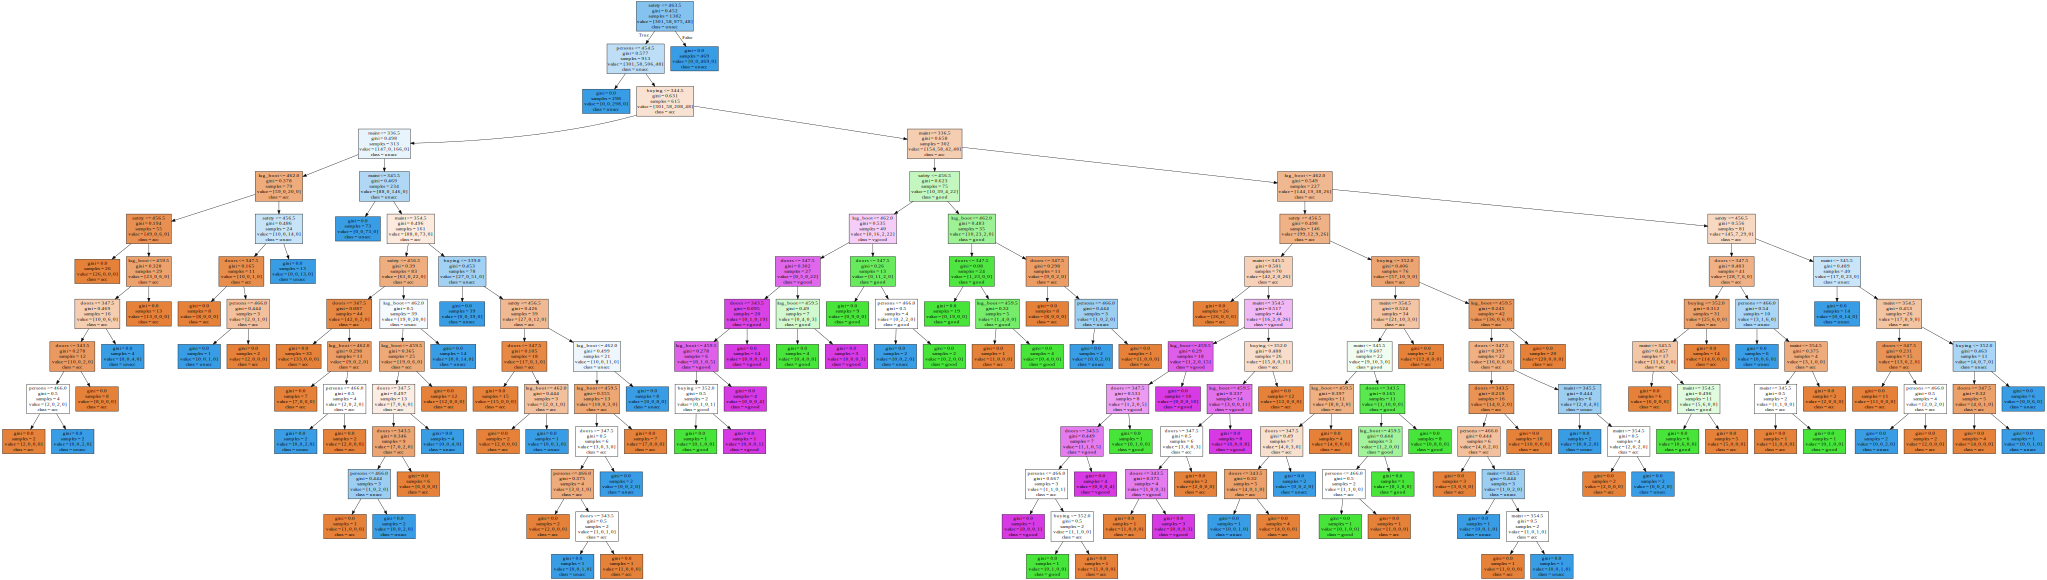

In [20]:
import graphviz


clf.fit(train_codificat_poli, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=train_codificat_poli.columns, class_names=clf.classes_,
                                filled=True)


graph = graphviz.Source(dot_data, format="png") 
graph


#### Pregunta 4: Extreu caracteristiques que quantifiquin l'arbre.


In [21]:
atributs = ['Nodes', 'Nodes fulla', 'Ratio nodes fulla',
      "Profunditat"]
carac = []

nodes = arbre_inicial.tree_.node_count
fulles = arbre_inicial.tree_.n_leaves
carac.append(nodes)
carac.append(fulles)
carac.append(round(fulles/nodes, 4))
carac.append(arbre_inicial.get_depth())

for i, j in zip(atributs, carac):
    print(i, ': ' + str(j))

Nodes : 171
Nodes fulla : 86
Ratio nodes fulla : 0.5029
Profunditat : 13


In [22]:
parametres = arbre_inicial.get_params(deep=True)
parametres

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 777,
 'splitter': 'best'}

#### Pregunta 5: Com afecta la codificació utilitzada a la interpretabilitat del model, veus alguna relació amb les característiques del arbre?

La codificació si separa atributs en diferents columnes (introdueix més dimensionalitat al nostre dataset) això probablement ens dirà que tindrem més nodes al nostre arbre perquè tindrem més atributs pels que classificar. De fet si ens fixem pel cas del BackwardDifference i pel Ordinal veurem que són els que més nodes ens retorna amb l'arbre. Mentre que el que ens retorna un nombre de nodes menor és el Sum i el HelmertEncoder, fins a 40 nodes menys i si ens fixem amb els resultats de fer la crossvalidació per veure com funcionen veurem que la mitjana d'aquesta és fins i tot més elevada que la del arbre amb 201 nodes. Aquests dos també ens augmenten la mida del dataset perquè separen els atributs en diferents columnes però sembla que la manera en la que operen és més adient que no pas el primer. El que ens ha retornat un resultat interessant és el  CountEncoder que té 26 nodes menys i retorna el resultat de crossvalidació més gran de tots tot i que la diferència és molt petita comparat amb el Sum i el Helmert i potser ens interesse molt més un arbre amb 14 nodes menys que un augment del accuracy tan petit. Al cap i a la fi el que ens interessa aquí és tenir un arbre el més petit possible sense ser tant conservadors amb el accuracy. 
Pel que fa a resultats quantificables veiem que tenen els mateixos resultats el SumEncoder i el HelmertEncoder i per una altra banda passa el mateix amb el BackwardDifferenceEncoder i el OrdinalEncoder. 

In [23]:
diccionari_res = {'Codificació': ["BackwardDifferenceEncoder", "CountEncoder", "SumEncoder", "HelmertEncoder", "OrdinalEncoder"], 'Nodes' : [], 'Nodes fulla': [], 'Ratio nodes fulla': [],
      "Profunditat arbre": [], "7-Crossvalidation":[], "Mitjana crossvalidation": []}

for X_encoded in encoded_trainings:
    clf = DecisionTreeClassifier(random_state = 777)
    clf.fit(X_encoded, y_train)
    L = []
    sortides_crossvalidation = cross_val_score(clf, X_encoded, y_train, cv=7)
    for i in sortides_crossvalidation:
        L.append(round(i,3))
    diccionari_res['7-Crossvalidation'].append(L)
    
    nodes = clf.tree_.node_count
    fulles = clf.tree_.n_leaves
    diccionari_res['Nodes'].append(nodes)
    diccionari_res['Nodes fulla'].append(fulles)
    diccionari_res['Ratio nodes fulla'].append(round(fulles/nodes, 4))
    diccionari_res['Profunditat arbre'].append(clf.get_depth())
    diccionari_res['Mitjana crossvalidation'].append(round(sum(L)/len(L), 3))

dataframe_carac = pd.DataFrame.from_dict(diccionari_res)  
dataframe_carac

,Codificació,Nodes,Nodes fulla,Ratio nodes fulla,Profunditat arbre,7-Crossvalidation,Mitjana crossvalidation
0,BackwardDifferenceEncoder,211,106,0.502,15,"[0.97, 0.975, 0.934, 0.964, 0.949, 0.98, 0.939]",0.959
1,CountEncoder,185,93,0.503,13,"[0.965, 0.985, 0.965, 0.959, 0.97, 0.99, 0.98]",0.973
2,SumEncoder,171,86,0.503,13,"[0.96, 0.985, 0.955, 0.97, 0.964, 0.99, 0.964]",0.970
3,HelmertEncoder,171,86,0.503,13,"[0.965, 0.985, 0.955, 0.954, 0.959, 0.99, 0.97]",0.968
4,OrdinalEncoder,211,106,0.502,15,"[0.955, 0.975, 0.934, 0.964, 0.949, 0.98, 0.939]",0.957


## B. Selecció de mesures d'atributs (20%)
El principal repte en la implementació de l'arbre de decisions és identificar els atributs que considerem com a node arrel i cada nivell. Aquest procés es coneix com a **selecció d’atributs**. Hi ha diferents mesures de selecció d’atributs per identificar l’atribut que es pot considerar com el node arrel de cada nivell. Les 2 mesures més populars:

### Guany d'informació (entropy)

En utilitzar el guany d’informació com a criteri, intentem estimar la informació que conté cada atribut. Per entendre aquest concepte, hem de conèixer el que significa l'**Entropia**.

L’entropia mesura la impuresa del conjunt de dades donat. A Física i Matemàtiques, l’entropia es coneix com l’atzar o incertesa d’una variable aleatòria $X$. En teoria de la informació, es refereix a la impuresa d’un grup d’exemples. **El guany d'informació** és la disminució de l'entropia. El guany d'informació calcula la diferència entre l'entropia abans de la divisió i l'entropia mitjana després de la divisió del conjunt de dades en funció dels valors d'atribut donats.

L’entropia es representa amb la següent fórmula:

$$ Entropy = \sum_{i=1}^{C} -p_i * log_2(p_i) $$

Aquí, $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'algorisme de l'arbre de decisions ID3 (dicotomitzador iteratiu) utilitza l'entropia per calcular el guany d'informació. Per tant, calculant la disminució de la **mesura d’entropia** de cada atribut podem calcular el seu guany d’informació. L'atribut amb el guany d'informació més alt es tria com a atribut de divisió al node.


### Índex Gini

Una altra mesura de selecció d’atributs que utilitza **CART (arbres categòrics i de regressió)** és el **índex Gini**. 

L'índex de Gini es representa així:

$$ Gini = 1 - \sum_{i=1}^{C} (p_i)^2 $$

Aquí, de nou $c$ és el nombre de classes i $p_i$ és la probabilitat associada a la classe $i$.

L'índex de Gini diu que, si seleccionem a l'atzar dos ítems d'una població, han de ser de la mateixa classe i la probabilitat d'això és d'1 si la població és pura.

En cas d’un atribut de valor discret, el subconjunt que dóna l’índex de gini mínim per a l’escollit es selecciona com a atribut de divisió. En el cas d’atributs de valor continu, l’estratègia consisteix a seleccionar cada parell de valors adjacents com a possible punt de divisió i punt amb un índex de gini més petit triat com a punt de divisió. L’atribut amb índex Gini mínim s’escull com a atribut de divisió.

Com a norma general, s’utilitza el **guany d’informació** com a criteri quan els atributs són categòrics i que el **índex Gini** quan s’assumeixen que els atributs són continus, però ambdós es fan servir a sklearn indistintament.

### Preguntes

1. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri el guany d'entropia.
2. Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri la impuritat de Gini.
3. S'assemblen els arbres resultants (visualment i en termes quantificables)? I la seva precisió en el conjunt de test, és similar?

#### Pregunta 1: Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri el guany d'entropia.

In [24]:
from sklearn.model_selection import GridSearchCV


parameters = dict(max_depth=range(1,35,1), min_samples_leaf=range(1,20,1), min_samples_split=range(2,25,1))
model_entropia = DecisionTreeClassifier(random_state=111, criterion='entropy')
clf_entropia = GridSearchCV(model_entropia, parameters, refit=True, n_jobs=-1)
clf_entropia.fit(encoded_ordinal_train, encoded_ordinal_target_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=111),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 35),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 25)})

In [25]:
clf_entropia.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [26]:
clf_entropia.best_score_

0.9659943493956993

#### Pregunta 2: Busca els millors hiperparametres per crear un arbre de decisió utilitzant com a criteri la impuritat de Gini.

In [27]:
model_gini = DecisionTreeClassifier(random_state=111, criterion='gini')
clf_gini = GridSearchCV(model_gini, parameters, refit=True, n_jobs=-1)
clf_gini.fit(encoded_ordinal_train, encoded_ordinal_target_train)


GridSearchCV(estimator=DecisionTreeClassifier(random_state=111), n_jobs=-1,
             param_grid={'max_depth': range(1, 35),
                         'min_samples_leaf': range(1, 20),
                         'min_samples_split': range(2, 25)})

In [28]:
clf_gini.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 9}

In [29]:
clf_gini.best_score_

0.9623711609899022

#### Pregunta 3: S'assemblen els arbres resultants (visualment i en termes quantificables)? I la seva precisió en el conjunt de test, és similar?

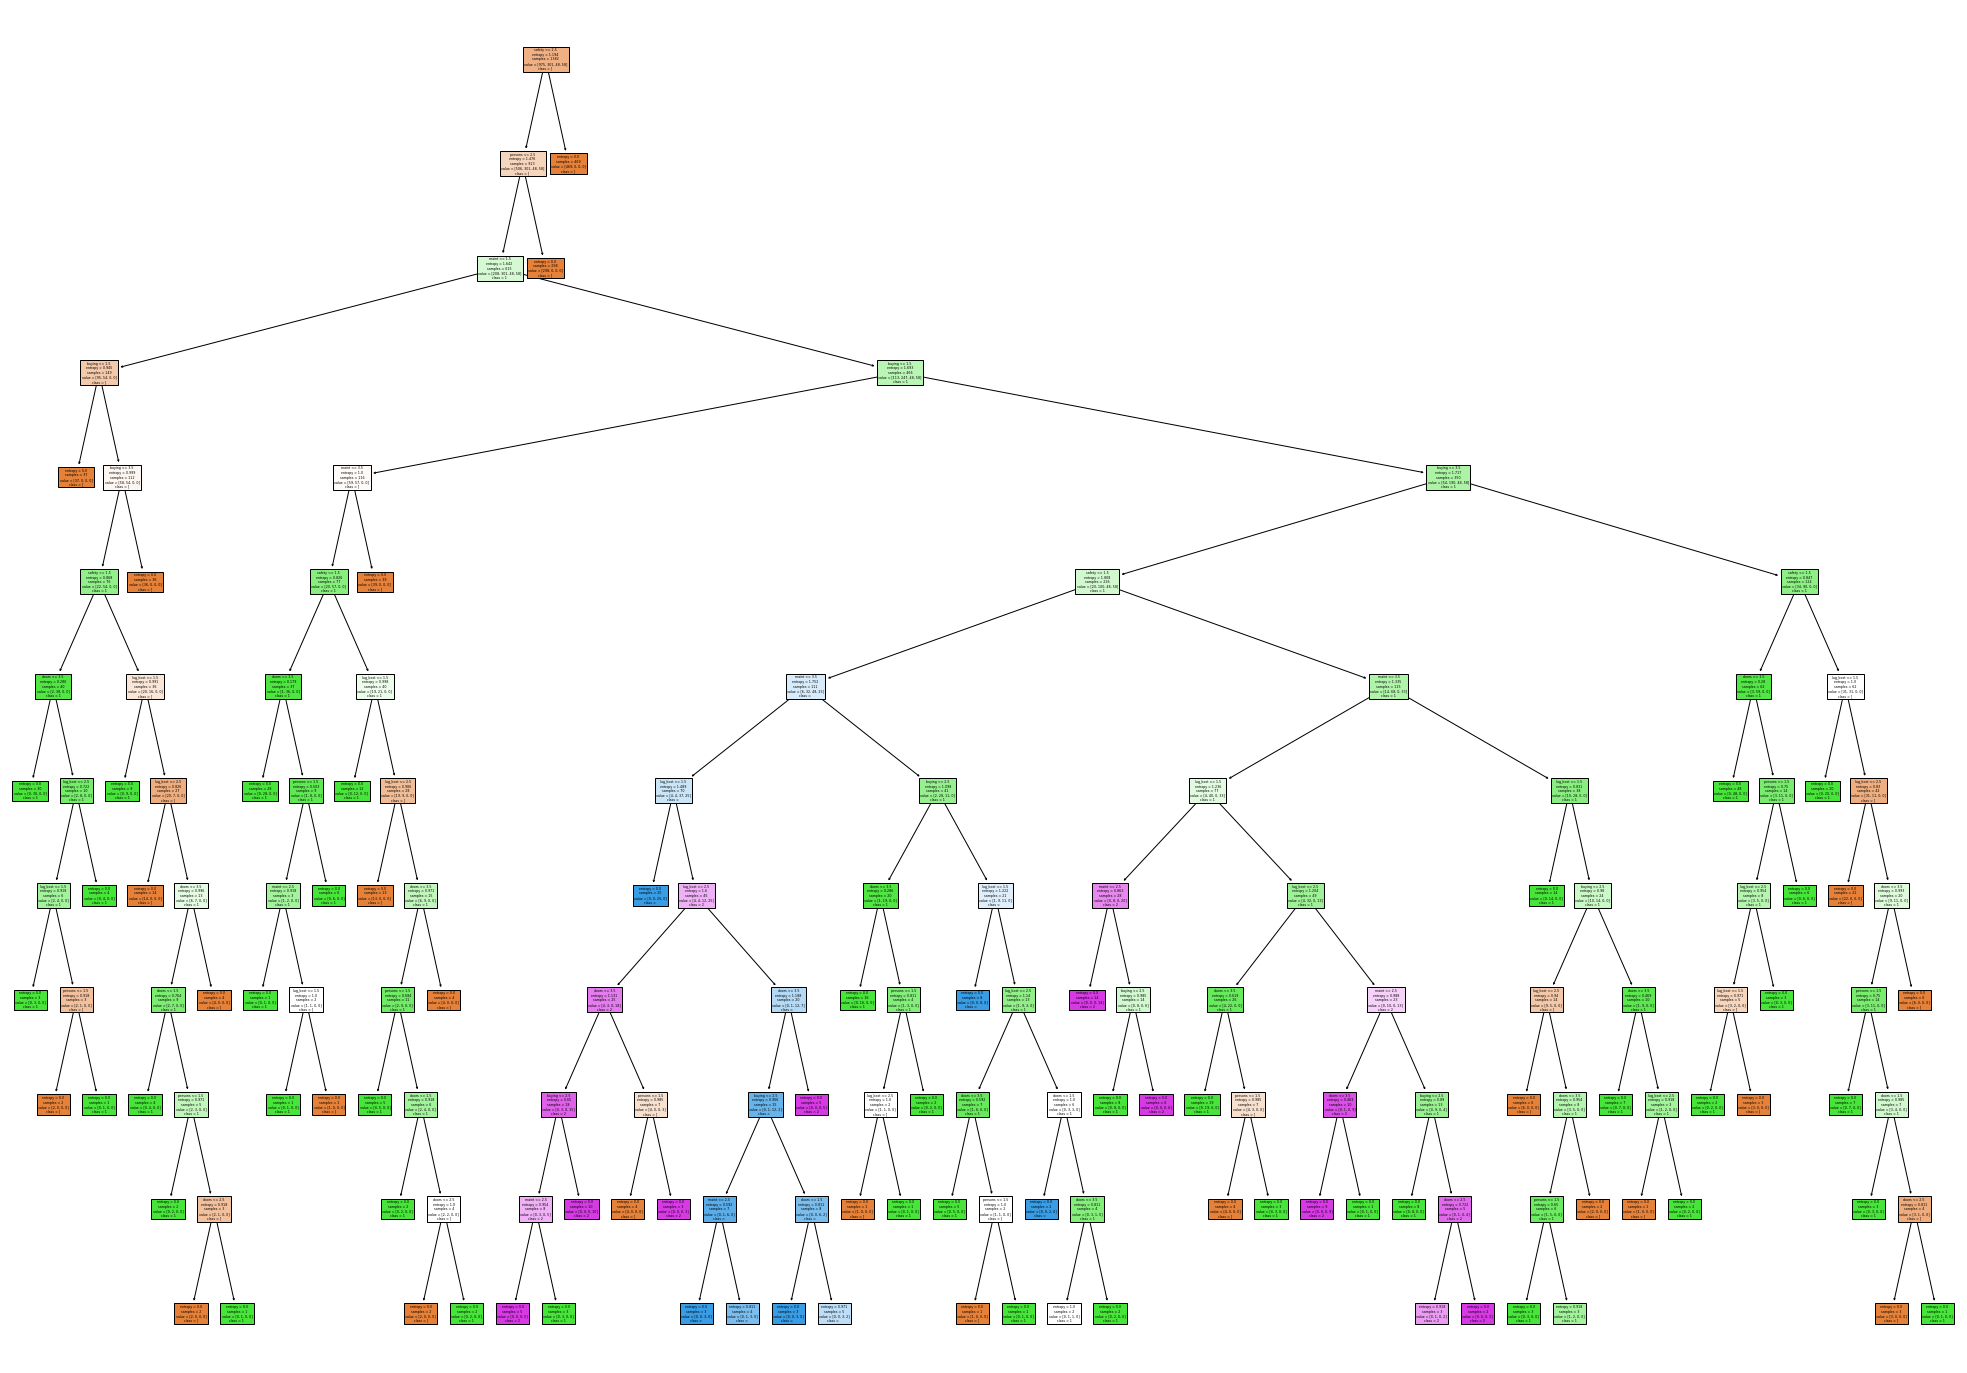

In [30]:
plt.figure(figsize=(35,25))
clf_entropia = DecisionTreeClassifier(random_state=111, criterion='entropy', max_depth=12, min_samples_leaf=1, min_samples_split=2)
clf_entropia.fit(encoded_ordinal_train, encoded_ordinal_target_train)
t_entropia = tree.plot_tree(clf_entropia, feature_names = encoded_ordinal_train.columns, class_names=str(clf_entropia.classes_), filled=True)
plt.show()

In [32]:
label = ['Nombre de nodes', 'Nombre de nodes fulla', 'Ratio de nodes fulla',
      "Profunditat de l'arbre"]
resu = []

nodes = clf_entropia.tree_.node_count
fulles = clf_entropia.tree_.n_leaves
resu.append(nodes)
resu.append(fulles)
resu.append(round(fulles/nodes, 3))
resu.append(clf_entropia.get_depth())
print("Informació sobre l'Arbre_Entropia:\n-----------------\n")
for i, j in zip(label, resu):
    print(i, ': ' + str(j))
print('\nPrecisió sobre el test: ' + str(round(clf_entropia.score(encoded_ordinal_test, encoded_ordinal_target_test), 3)))

Informació sobre l'Arbre_Entropia:
-----------------

Nombre de nodes : 163
Nombre de nodes fulla : 82
Ratio de nodes fulla : 0.503
Profunditat de l'arbre : 12

Precisió sobre el test: 0.96


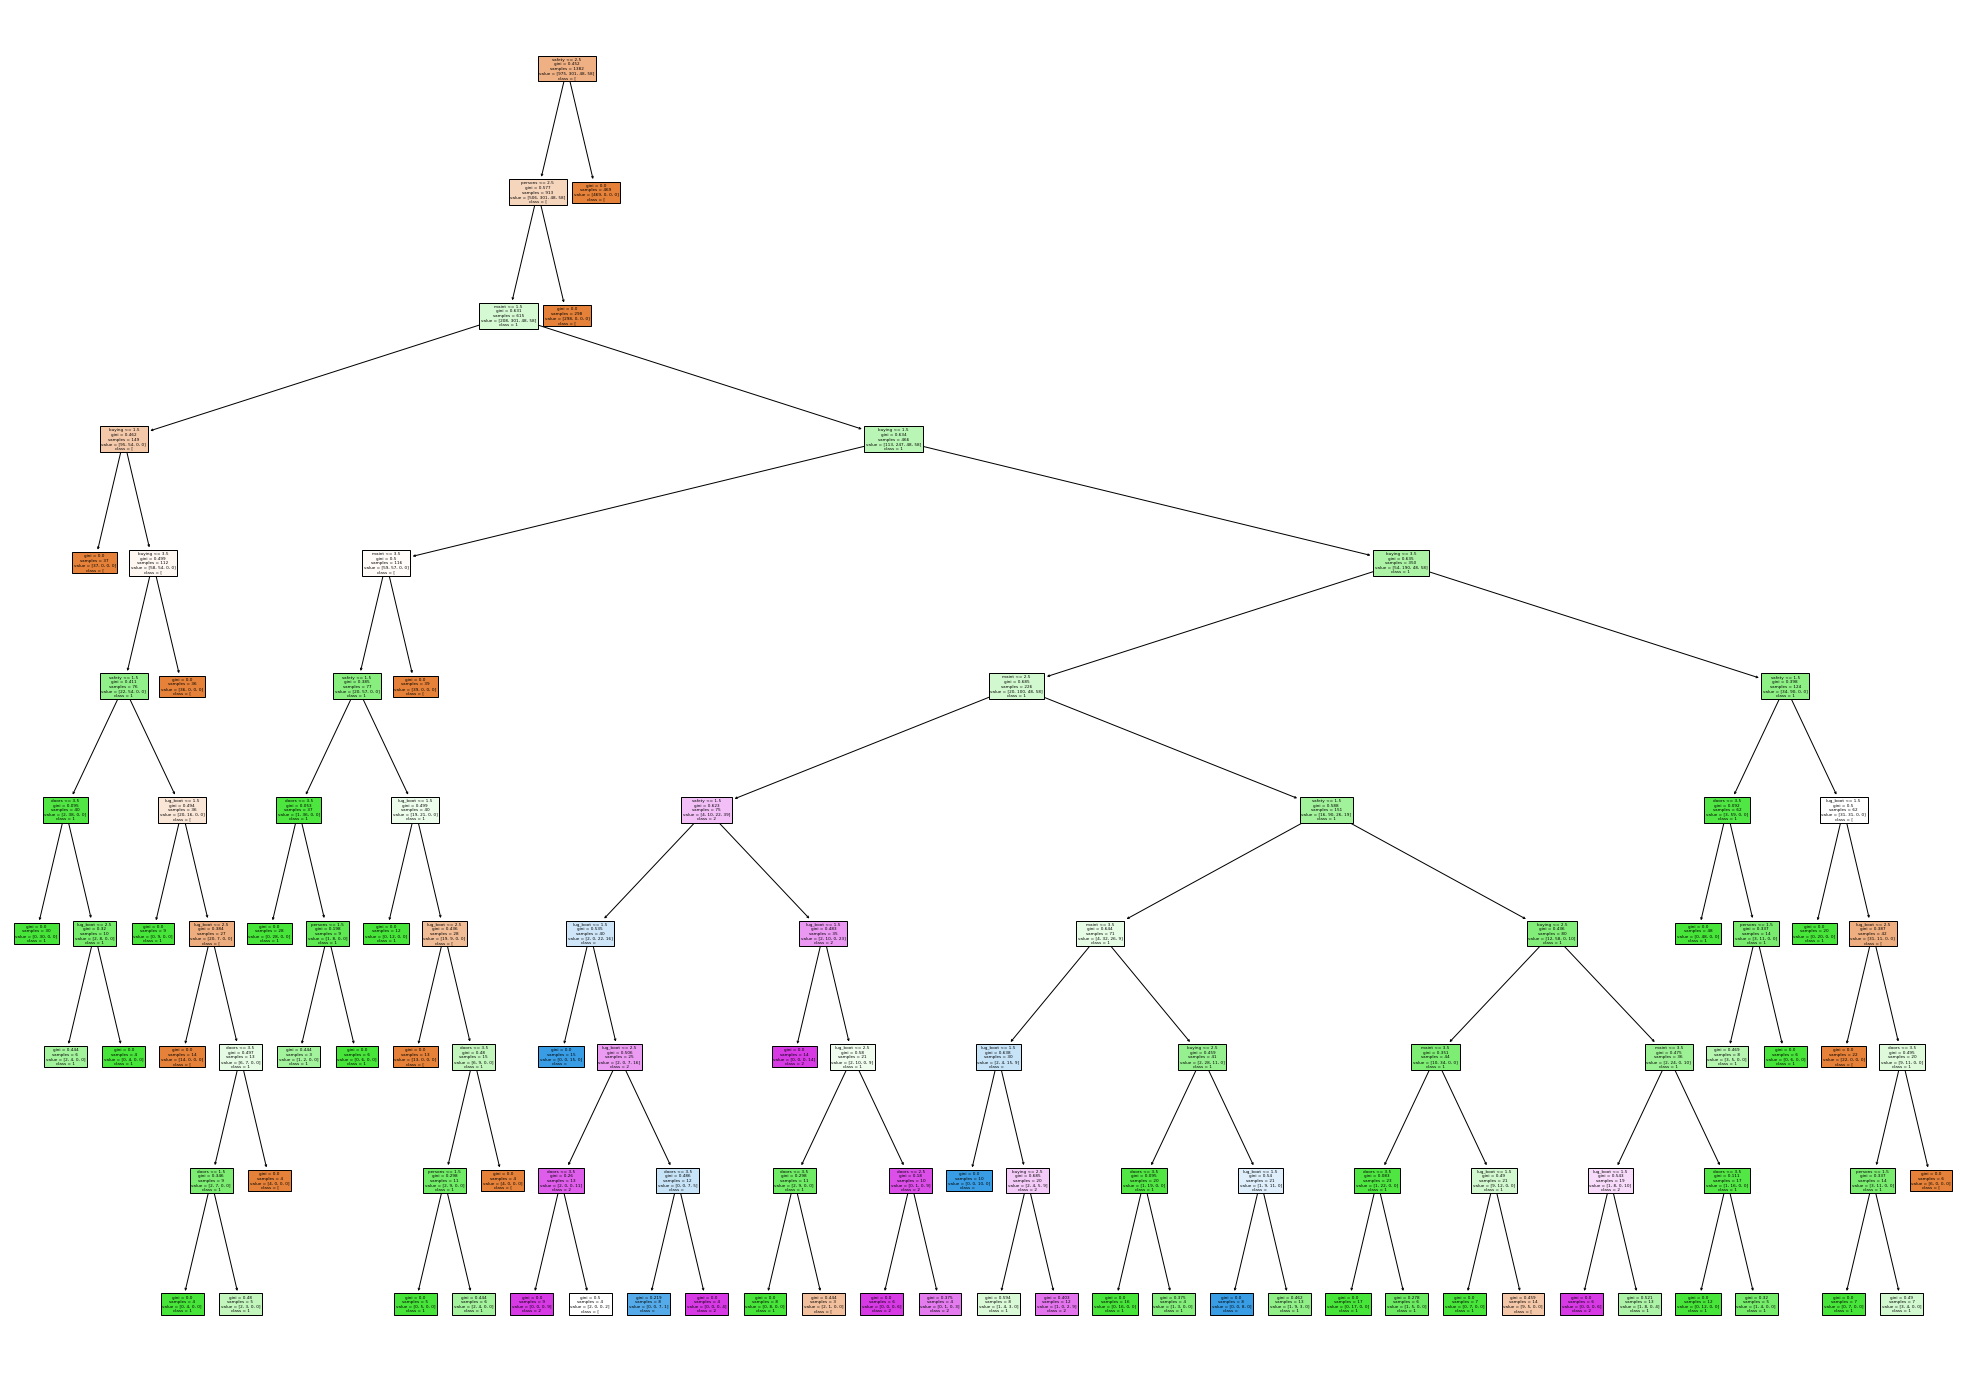

In [33]:
plt.figure(figsize=(35,25))
clf_gini = DecisionTreeClassifier(random_state=111, criterion='gini', max_depth=10, min_samples_leaf=3, min_samples_split=9)
clf_gini.fit(encoded_ordinal_train, encoded_ordinal_target_train)
_ = tree.plot_tree(clf_gini, feature_names = encoded_ordinal_train.columns, class_names=str(clf_gini.classes_), filled=True)
plt.show()

In [34]:
lab = ['Nombre de nodes', 'Nombre de nodes fulla', 'Ratio de nodes fulla',
      "Profunditat de l'arbre"]
res = []

nodes = clf_gini.tree_.node_count
fulles = clf_gini.tree_.n_leaves
res.append(nodes)
res.append(fulles)
res.append(round(fulles/nodes, 3))
res.append(clf_gini.get_depth())
print("Informació sobre l'Arbre_Gini:\n-----------------\n")
for i, j in zip(lab, res):
    print(i, ': ' + str(j))
print('\nPrecisió per gini: ' + str(round(clf_gini.score(encoded_ordinal_test, encoded_ordinal_target_test), 3)))

Informació sobre l'Arbre_Gini:
-----------------

Nombre de nodes : 107
Nombre de nodes fulla : 54
Ratio de nodes fulla : 0.505
Profunditat de l'arbre : 10

Precisió per gini: 0.954


En termes quantificables no s'assemblen gaire, la diferència és molt gran pel nombre de nodes de cadascún d'aquests (163 vs 107), la diferència és molt considerable, i també pels nodes fulla (82 vs 54). La precissió és pràcticament la mateixa, només varia un 0.006 de precissió pel cas de l'arbre amb menys nodes, però no és significatiu. De fet ens convé molt més tenir un 52% menys de nodes per l'arbre on fem servir Gini. Visualment si ens fixem, al Gini tenim moltes branques de l'arbre diferents i menys nodes i un accuracy que no varia respecte a l'entropia, ens interessa molt més aquest arbre més "directe".

## C. Pruning (20%)

L'overfitting és un problema comú quan es construeixen models d’arbres de decisions. El problema apareix quan l'algoritme continua aprofundint cada vegada més per reduir l'error del conjunt d'entrenament, però per contra, resulta que va augmentant l'error en el conjunt de test. Per tant, la precisió final del model será menor. Generalment passa quan es creen moltes branques a causa de valors atípics i irregularitats en les dades (o mal codificades) [Exemple del resultat de tenir Atributs mal codificats en un arbre de decisió](https://stackoverflow.com/questions/61217713/labelencoder-for-categorical-features/61217936).

Dos enfocaments que es poden utilitzar per evitar l'overfitting:

* **Poda prèvia**: aturem la construcció dels arbres abans d'arribar a la fulla final. Preferim no dividir un node si la seva mesura de bondat està per sota d’un valor llindar. Però és difícil triar un punt d’aturada adequat.

* **Post poda**: aprofundim cada vegada més en l’arbre per construir un arbre complet. Si l’arbre mostra problemes d'overfitting, la poda es fa com un pas posterior al aprenentatge. Mitjançant dades de validació creuada, comprovem si ampliar un node comportarà una millora o no. Si mostra una millora, podem continuar ampliant aquest node. Però si mostra una reducció de la precisió, no s’hauria d’ampliar. Per tant, el node s’hauria de convertir en un node fulla.

### Preguntes

1. Amb els parametres del millor arbre de l'apartat anterior, realitza una poda prèvia. Com pots validar si ho estàs fent bé?
2. Realitza una poda posterior del arbre [Pista](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning).
3. Compara els arbres resultants i els resultats que se'n obtenen. S'assemblen? Quina de les dues tècniques creus que s'adecua millor a la vostra base de dades? A part de visualment, compara'ls també quantificablement.


#### Pregunta 1: Amb els paràmetres del millor arbre de l'apartat anterior, realitza una poda prèvia. Com pots validar si ho estàs fent bé?

In [39]:
import numpy as np
d_ret = {'impuresa': [str(round(i,7)) for i in np.arange(5e-7, 5e-3, 3e-4)], 'accuracy': [], 'nodes': [], 'nodes fulla': []}

impuresa=0

for valor in np.arange(5e-7, 5e-3, 3e-4):
    clf_temp = DecisionTreeClassifier(random_state=111, criterion='gini', max_depth=10, splitter='best', min_samples_leaf=3, min_samples_split=9, min_impurity_decrease=valor)
    
    clf_temp.fit(encoded_ordinal_train, y_train)
    
    pres = clf_temp.score(encoded_ordinal_test, y_test)
    
    d_ret['accuracy'].append(pres)
    d_ret['nodes'].append(clf_temp.tree_.node_count)
    d_ret['nodes fulla'].append(clf_temp.tree_.n_leaves)
    
    
    if pres == max(d_ret['accuracy']):
        clf_pre = clf_temp
        impuresa = valor

print('\nEl millor valor per el mínim de la impuresa és: ' + str(round(impuresa,7)))
print('Amb un valor de accuracy de: '+str(max(d_ret['accuracy'])))


El millor valor per el mínim de la impuresa és: 0.0015005
Amb un valor de accuracy de: 0.9566473988439307


In [36]:
df = pd.DataFrame.from_dict(d_ret)

print(df.to_string())

     impuresa  accuracy  nodes  nodes fulla
0       5e-07     0.954    107           54
1   0.0003005     0.954     95           48
2   0.0006005     0.954     87           44
3   0.0009005     0.954     83           42
4   0.0012005     0.954     79           40
5   0.0015005     0.957     77           39
6   0.0018005     0.945     67           34
7   0.0021005     0.945     67           34
8   0.0024005     0.945     67           34
9   0.0027005     0.939     61           31
10  0.0030005     0.913     55           28
11  0.0033005     0.913     55           28
12  0.0036005     0.899     51           26
13  0.0039005     0.899     45           23
14  0.0042005     0.908     41           21
15  0.0045005     0.908     41           21
16  0.0048005     0.896     39           20


Aquí si ens fixem veurem que estem podant correctament l'arbre, de fet arribem a passar de 107 nodes a tenir-ne 75 sense que el accuracy sigui pitjor, de fet puja una mica, tampoc gaire. Si ens relaxem una miqueta amb el accuracy veurem que fins i tot podem passar a tenir 67 nodes amb una penalització del 0.01 aproximadament sobre l'accuracy respecte al arbre original de 107 nodes. Passem a tenir un 59% menys de nodes i nodes fulla (54 vs 34), canvi molt significatiu. Fem l'arbre cada cop més petit sense alterar gaire el accuracy, a partir d'aquí si anem podant més i més ja veiem com l'accuracy te una pèrdua a cada cop més significativa, però aquest darrer exemple seria un bon punt de tall, tot i que depèn del problema que estiguem tractant. 

#### Pregunta 2: Realitza una poda posterior del arbre. 

In [40]:
clf_temp_2a = DecisionTreeClassifier(random_state=111, criterion='gini', max_depth=10, splitter='best', min_samples_leaf=3, min_samples_split=9)
clf_temp_2a.fit(encoded_ordinal_train, y_train)
path = clf_temp_2a.cost_complexity_pruning_path(encoded_ordinal_train, y_train)
ccp_alphas = path.ccp_alphas

In [41]:
l = []
dic = {'alpha': [], 'accuracy': [], 'nodes': [], 'nodes fulla': []}
clf_post = None

for alp in ccp_alphas:
    clf_temp2 = DecisionTreeClassifier(ccp_alpha = alp, random_state=111, criterion='gini', max_depth=10, splitter='best', min_samples_leaf=3, min_samples_split=9)

    clf_temp2.fit(encoded_ordinal_train, y_train)
    
    pres = clf_temp2.score(encoded_ordinal_test, y_test)
    
    if pres < 0.9:
        continue
    
    dic['accuracy'].append(pres)
    dic['nodes'].append(clf_temp2.tree_.node_count)
    dic['nodes fulla'].append(clf_temp2.tree_.n_leaves)
    dic['alpha'].append(alp)
    
    if pres == max(dic['accuracy']):
        clf_post = clf_temp2          
    

In [42]:
df2 = pd.DataFrame.from_dict(dic)
print(df2.to_string())

    alpha  accuracy  nodes  nodes fulla
0   0.000     0.954    107           54
1   0.000     0.954    105           53
2   0.000     0.954    103           52
3   0.000     0.954    101           51
4   0.000     0.954     97           49
5   0.000     0.954     95           48
6   0.000     0.954     93           47
7   0.000     0.954     91           46
8   0.000     0.954     89           45
9   0.001     0.954     87           44
10  0.001     0.954     85           43
11  0.001     0.954     83           42
12  0.001     0.954     81           41
13  0.001     0.954     79           40
14  0.001     0.957     77           39
15  0.002     0.957     75           38
16  0.003     0.954     73           37
17  0.003     0.948     69           35
18  0.003     0.945     65           33
19  0.003     0.939     61           31
20  0.003     0.931     59           30
21  0.003     0.931     57           29
22  0.003     0.913     55           28
23  0.004     0.910     53           27


#### Pregunta 3: Compara els arbres resultants i els resultats que s'obtenen. S'assemblen? Quina de les dues tècniques creus que s'adecua millor a la vostra base de dades? A partir de visualment, compara'ls també quantificablement.

Si faig servir els mateixos alphas per tots dos els resultats són gairebé els mateixos bàsicament. Podem arribar a tenir el mateix arbre per un mètode com per l'altre. A la post-poda podem veure que tenim 2 nodes menys tot i que no és una diferència rellevant. Si fem servir uns altres alpha's canviaria el resultat d'un al altre. 

In [43]:
diccionari_resultats = {'Tipus de poda': ['Pre-poda', 'Post-poda'], 'Nombre de nodes' : [], 'Nombre de nodes fulla': [], 
     'Ratio de nodes fulla': [], 'Accuracy':[], "Profunditat de l'arbre": []}

for arbre in [clf_pre, clf_post]:
    nodes = arbre.tree_.node_count
    fulles = arbre.tree_.n_leaves
    diccionari_resultats['Nombre de nodes'].append(nodes)
    diccionari_resultats['Nombre de nodes fulla'].append(fulles)
    diccionari_resultats['Ratio de nodes fulla'].append(round(fulles/nodes, 3))
    diccionari_resultats["Profunditat de l'arbre"].append(arbre.get_depth())
    diccionari_resultats['Accuracy'].append(arbre.score(encoded_ordinal_test, y_test))
    
df_arbres = pd.DataFrame.from_dict(diccionari_resultats)  
df_arbres

,Tipus de poda,Nombre de nodes,Nombre de nodes fulla,Ratio de nodes fulla,Accuracy,Profunditat de l'arbre
0,Pre-poda,77,39,0.506,0.957,10
1,Post-poda,75,38,0.507,0.957,10


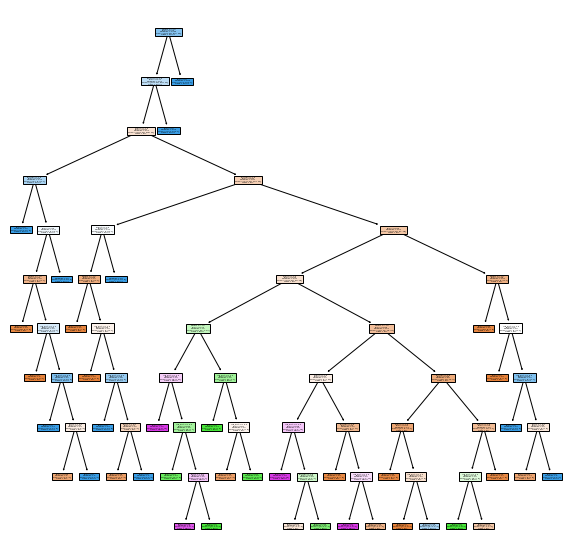

In [44]:
fig1 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf_pre, max_depth=None,feature_names=encoded_ordinal_train.columns, class_names=clf_pre.classes_,
                   filled=True)
plt.show()

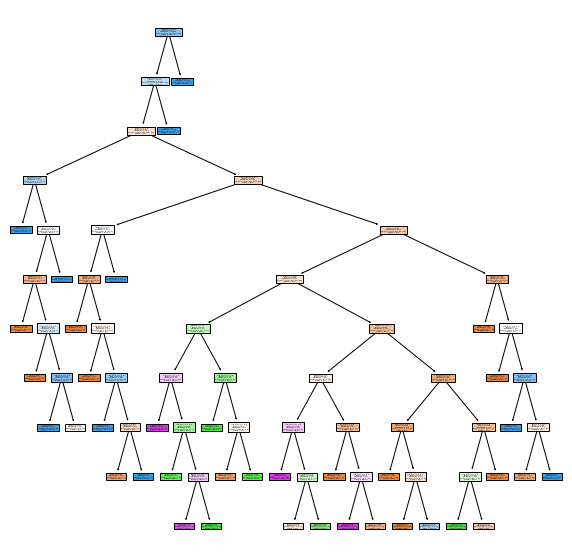

In [45]:
fig2 = plt.figure(figsize=(10,10))
_ = tree.plot_tree(clf_post, max_depth=None,feature_names=encoded_ordinal_train.columns, class_names=clf_post.classes_,
                   filled=True)
plt.show()

## D. Ensembles / Ransom Forests(30%)

Finalment, una altra forma de reduir el overfitting és mitjançant l'ús d'ensembles. Els ensembles son agrupacions d' arbres de decisió, dels quals la sortida final és generada a través del promig de les classificacions individuals de cada arbre. 

Si tots els arbres es construïssin igual, la seva unió seria molt similar, i per tant no milloraria gaire. Per tal d'afavorir la variabilitat dels models, i aixi tenir un promig més ric, existeixen varies tècniques [documentació](https://scikit-learn.org/stable/modules/ensemble.html)

Per exemple, un dels més utilitzats són els `RandomForest`, que són una implementació especifica per ajuntar multiples arbres que retorna una mitja de la sortida de cada arbre, que ha sigut entrenat en un subconjunt aleatori de les dades. Ara bé, no són la única forma de fer ensembles. També existeixen els `ExtraTreesClassifier`, que encara afegeixen més variabilitat als arbres, restrigint la búsqueda de possibles nodes de decisió. D'altres formes d'ensembles podrien ser els `AdaBoost`, que en poques paraules, pesen els errors comesos pels arbres anteriors quan creen els següents arbres.

### Preguntes

1. Aplica models d'ensembles a les **dues** bases de dades. 
2. Compara els resultats obtinguts amb els diferents models. 
3. Quin dona millors resultats?
5. Pots combinar models que s'han après amb caracteristiques codificades de forma diferent? Creus que aconseguiràs un resultat més bo?


#### Pregunta 1: Aplica models d'ensembles a les dues bases de dades. 

Primer que res el que farem serà llegir el segon dataset i explorar-lo una mica. Veiem que té unes dimensions de 32561 exemples i 15 atributs.

In [46]:
dataset_ingressos = load_dataset('income_evaluation.csv')
y_ingres = dataset_ingressos['income']
X_ingres = dataset_ingressos.drop('income', axis='columns')

dataset_ingressos

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Tot seguit el que faré serà definir el nostre training i el nostre test. Com a mètode per codificar els atributs categòrics el que faré servir serà el OrdinalEncoder que és el mateix amb el que hem estat treballant per l'altre dataset. Veurem com varia el score pels diferents datasets pels diferents tipus de ensembles amb un mateix codificador i després mirarem de fer alguna altra prova fent servir altres. 

In [47]:
X_train_income, X_test_income, y_train_income, y_test_income = train_test_split(X_ingres, y_ingres,test_size = 0.2, random_state = 19)


encoder_income_x = ce.OrdinalEncoder(cols=[' workclass', ' education',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex', ' native-country'])
encoded_income_xtrain = encoder_income_x.fit_transform(X_train_income)
encoded_income_xtest = encoder_income_x.transform(X_test_income)
encoder_income_y = ce.OrdinalEncoder(cols = ['income'])
encoded_income_ytrain = encoder_income_y.fit_transform(y_train_income)
encoded_income_ytest = encoder_income_y.transform(y_test_income)

Començarem pel dataset amb el que haviem treballat fins ara. Provarem els tres ensembles que ens ha comentat el professor i després muntarem una taula per veure els resultats pels dos datasets i per cadascuna de les configuracions.
Cal tenir en compte que AdaBoost generalment fa overfitting sobre el nostre model, aleshores hem de modificar el paràmetre learning_rate per aquest ensemble perquè ens doni un score més elevat, sinó arriba a ser del 0.60-0.70 només.

Nota: a la funció fit per entrenar el model passem el target amb una petita conversió fent servir la funció values i ravel().

In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier 
score_test = []
score_train = []
rf_cars = RandomForestClassifier(n_estimators=22, random_state=2)
rf_cars.fit(encoded_ordinal_train, encoded_ordinal_target_train.values.ravel())
score_test.append(rf_cars.score(encoded_ordinal_test, encoded_ordinal_target_test.values.ravel()))
score_train.append(np.mean(cross_val_score(rf_cars,encoded_ordinal_train, encoded_ordinal_target_train.values.ravel(), cv=10)))

et_cars = ExtraTreesClassifier(n_estimators=22, random_state=2)
et_cars.fit(encoded_ordinal_train, encoded_ordinal_target_train.values.ravel())
score_test.append(et_cars.score(encoded_ordinal_test, encoded_ordinal_target_test.values.ravel()))
score_train.append(np.mean(cross_val_score(et_cars,encoded_ordinal_train, encoded_ordinal_target_train.values.ravel(), cv=10)))

ab_cars = AdaBoostClassifier(n_estimators=22, random_state=2)
ab_cars.fit(encoded_ordinal_train, encoded_ordinal_target_train.values.ravel())
score_test.append(ab_cars.score(encoded_ordinal_test, encoded_ordinal_target_test.values.ravel()))
score_train.append(np.mean(cross_val_score(ab_cars,encoded_ordinal_train, encoded_ordinal_target_train.values.ravel(), cv=10)))

In [49]:
rf_income = RandomForestClassifier(n_estimators=22, random_state=2)
rf_income.fit(encoded_income_xtrain, encoded_income_ytrain.values.ravel())
score_test.append(rf_income.score(encoded_income_xtest, encoded_income_ytest.values.ravel()))
score_train.append(np.mean(cross_val_score(rf_income,encoded_income_xtrain, encoded_income_ytrain.values.ravel(), cv=10)))

et_income = ExtraTreesClassifier(n_estimators=22, random_state=2)
et_income.fit(encoded_income_xtrain, encoded_income_ytrain.values.ravel())
score_test.append(et_income.score(encoded_income_xtest, encoded_income_ytest.values.ravel()))
score_train.append(np.mean(cross_val_score(et_income,encoded_income_xtrain, encoded_income_ytrain.values.ravel(), cv=10)))

ab_income = AdaBoostClassifier(n_estimators=22, random_state=2)
ab_income.fit(encoded_income_xtrain, encoded_income_ytrain.values.ravel())
score_test.append(ab_income.score(encoded_income_xtest, encoded_income_ytest.values.ravel()))
score_train.append(np.mean(cross_val_score(ab_income,encoded_income_xtrain, encoded_income_ytrain.values.ravel(), cv=10)))

#### Pregunta 2: Compara els resultats obtinguts amb els diferents models. 

Podem veure els resultats de les proves que hem fet amb els diferents ensamblers just a sota. Veiem els tres ensambles que hem fet servir per cadascún dels dos datasets i el crossvalidation value que ens ha donat així com el accuracy sobre el test. Aquestes proves les hem fet fent servir un tipus de codificació concreta pels dos datasets com és el OrdinalEncoder. Veiem que la diferència de l'accuracy entre crossvalidation i el test no és gaire elevada, aleshores el overfitting penso que l'hem reduït bastant fent servir aquests models d'ensembles. 

In [50]:
diccionari_resultats = {'Dataset': ['Cars','Cars', 'Cars', 'Income','Income','Income'], 'Algorisme': ['RandomForest', 'ExtraTrees', 'AdaBoost','RandomForest', 'ExtraTrees', 'AdaBoost'], 'Crossvalidation': score_train, 'Accuracy Test': score_test}
pd.DataFrame.from_dict(diccionari_resultats)

,Dataset,Algorisme,Crossvalidation,Accuracy Test
0,Cars,RandomForest,0.957,0.957
1,Cars,ExtraTrees,0.945,0.942
2,Cars,AdaBoost,0.779,0.763
3,Income,RandomForest,0.853,0.848
4,Income,ExtraTrees,0.842,0.844
5,Income,AdaBoost,0.853,0.855


#### Pregunta 3: Quin dona millors resultats?

El que millor resultats dona tant per un dataset com per l'altre és el RandomForest. Els valors canvien bastant d'un dataset a un altre, entenc que aquí el que passa és que estem tractant dos problemes diferents i cadascún d'ells potser li vagi millor codificar alguns atributs amb un codificador concret que no pas un altre diferent. Potser el codificador que hem fet servir pel cas del dataset Income no sigui el més eficient pel que fa als resultats que hem obtingut però si veiem al dataset Cars veurem que tenim dos bons resultats amb RandomForest i ExtraTrees. Pel cas del segon dataset ens baixa el accuracy tant per RandomForest com per ExtraTrees però puja AdaBoost. De fet pel segon cas tenim un millor rendiment per AdaBoost que per RandomForest però si veiem al primer dataset el resultat que ens ha donat el AdaBoost veurem que no és queda molt lluny dels altres dos. Així doncs penso que depen sempre del problema, i que hem de pensar una mica amb el tipus de codificació que fem servir donat un dataset concret amb uns atributs amb les seves característiques així com fer una mica de recerca i llegir sobre les especificacions i advantatges que ens donen els diferents ensembles per veure quin és el que millor s'adapta al nostre problema.   

#### Pregunta 4: Pots combinar models que s'han après amb característiques codificades de forma diferent? Creus que aconseguiràs un resultat més bo?

Hi han ensembles que ens permeten definir més d'un model per poder entrenar les dades i veure el performance que aquests tenen amb les crossvalidacions i el testeig que després fem sobre el conjunt de test. Aquests ensembles es poden basar en el vot majoritari per veure quines han estat les sortides més repetides entre tots els models que s'han combinat, això se'n diu hard voting, també ho podem fer amb probabilitats, agafant com a output aquella classe que tingui la suma de probabilitats més elevada entre els models per exemple. Hi podem ficar per exemple un logistic regressor, un SVM, un linear regressor per descens del gradient, un decission tree, un KNN fins i tot... Això ens permet tenir un conjunt de resultats més ampli fent servir algorismes completament diferents per apropar-nos més al resultat més bo que poguem aconseguir. No tinc cap dubte que hi han algorismes que funcionen millor amb els atributs codificats amb uns codificadors concrets pels requeriments que aquests tenen per funcionar correctament, com per exemple el construir variables dummy pel cas de regressors lineals en comptes de tenir variables categòriques amb les que no podria treballar. Un cop les passem a dummy variables aleshores tindriem atributs ordinals. Un bon mètode de codificació aquí al linear regressor seria el OneHotEncoding per exemple. 
Aleshores el mètode de codificació penso que importa molt depenent el model amb el que s'estigui treballant i sobretot el problema amb el que estiguem tractant. De fet fins i tot potser ens convé barrejar dos atributs en un sol quan aquests són ortogonals entre ells. Aquesta barreja d'atributs es podria fer mitjançant suma, mitjana o fins i tot primera component principal dels atributs que s'estiguin barrejant. Moltes vegades podem veure una millora en el accuracy i per tant uns resultats més bons pel nostre model un cop els barrejem, tot i que ho hem d'estudiar amb molta cura i tot això porta un cert temps i s'ha de tenir un coneixement sobre el tema que es tracta en el problema.
De fet si adaptem les dades per cada model, fent que cadascún d'aquests tinguin una codificació concreta que sigui més adient per ells podrem obtenir uns resultats més bons individualment per cadascún d'aquests i en general arribar a tenir un vot majoritari més precís. 
Llavors, si combinem diferents mètodes de codificació per diferents models ens podràn donar més informació sobre el problema que estem tractant i en general penso que podrem incrementar la qualitat dels nostres resultats. Potser hauriem de pensar concretament en quins fer servir i per què fer-los servir tenint en compte el dataset amb el que tractem i els requeriments dels algorismes amb els que volem treballar en comptes de fer-los servir a la babalà que potser no te cap sentit. Penso que ens pot aportar un benefici el poder construïr un ensemble amb un VotingClassifier fent servir diferents models que hem estat veient en aquestes darreres setmanes amb diferents mètodes de codificació per tenir un resultat realment bo. Fins i tot podriem fer servir cerques de hiperparametres i comprovar amb crossvalidacions que realment responen correctament i tenir després un vot majoritari força robust.